In [2]:
# Loading all the Libraries which we will be using in our prediction
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
import cv2
import zipfile
import os
from matplotlib import pyplot as plt
import random as rand
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.vgg19 import VGG19
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=  True)

test_datagen = ImageDataGenerator(rescale = 1./255) 

In [4]:
train = train_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/train',target_size=(224,224),batch_size=32)

Found 4192 images belonging to 2 classes.


In [5]:
test = test_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/test',target_size=(224,224),batch_size=32)

Found 624 images belonging to 2 classes.


In [6]:
d=train.class_indices

In [7]:
max_val=max(Counter(train.classes).values())

In [8]:
count=Counter(train.classes)
count

Counter({1: 3110, 0: 1082})

In [9]:
class_weights={c:max_val/v for c,v in count.items()}

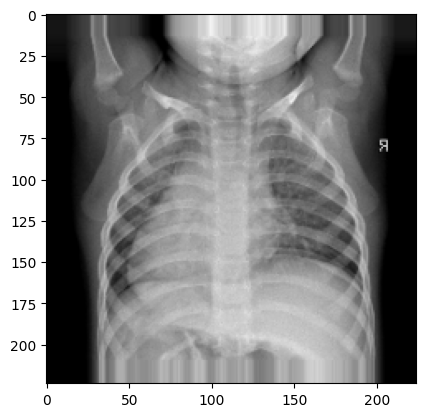

normal


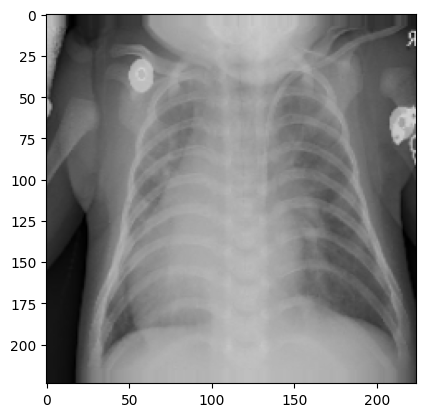

In [10]:
for j in range(len(train[0][1])):
  if list(train[0][1][j])[0]==1.:
    plt.imshow(train[0][0][j])
    plt.show()
    print(list(d.keys())[0])
    break
for j in range(len(train[0][1])):
 if list(train[0][1][j])[1]==1.:
    plt.imshow(train[0][0][j])
    plt.show()
    break

In [11]:
vgg19=VGG19(input_shape=(224,224,3),include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [12]:
for layers in vgg19.layers:
    layers.trainable=False

In [13]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
flatten=Flatten()(vgg19.output)
dense=Dense(64,activation='relu')(flatten)
dense=Dense(32,activation='relu')(dense)
prediction=Dense(2,activation='softmax')(dense)
model=Model(inputs=vgg19.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [16]:
model.fit_generator(train,validation_data=test,epochs=20,verbose=1,class_weight=class_weights)

/tmp/ipykernel_42/2372036374.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,validation_data=test,epochs=20,verbose=1,class_weight=class_weights)


Epoch 1/20
131/131 [==============================] - 126s 894ms/step - loss: 0.4197 - accuracy: 0.8848 - val_loss: 0.2302 - val_accuracy: 0.9295
Epoch 2/20
131/131 [==============================] - 78s 595ms/step - loss: 0.2534 - accuracy: 0.9375 - val_loss: 0.2305 - val_accuracy: 0.9199
Epoch 3/20
131/131 [==============================] - 78s 594ms/step - loss: 0.2082 - accuracy: 0.9425 - val_loss: 0.2042 - val_accuracy: 0.9279
Epoch 4/20
131/131 [==============================] - 81s 616ms/step - loss: 0.1952 - accuracy: 0.9456 - val_loss: 0.2328 - val_accuracy: 0.9311
Epoch 5/20
131/131 [==============================] - 80s 609ms/step - loss: 0.1645 - accuracy: 0.9561 - val_loss: 0.2129 - val_accuracy: 0.9247
Epoch 6/20
131/131 [==============================] - 78s 593ms/step - loss: 0.1719 - accuracy: 0.9516 - val_loss: 0.2218 - val_accuracy: 0.9343
Epoch 7/20
131/131 [==============================] - 78s 593ms/step - loss: 0.1655 - accuracy: 0.9499 - val_loss: 0.2468 - val_a

In [24]:
ypred=model.predict(test)
ypred=np.argmax(ypred,axis=1)

20/20 [==============================] - 5s 245ms/step


<Axes: >

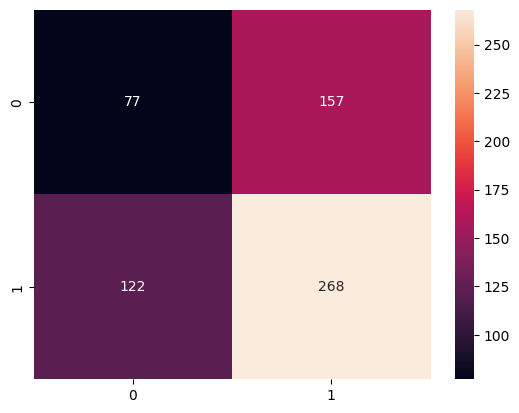

In [25]:
sns.heatmap(confusion_matrix(test.classes,ypred),annot=True,fmt='g')

In [26]:
print(classification_report(test.classes,ypred,target_names=['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.39      0.33      0.36       234
   Pneumonia       0.63      0.69      0.66       390

    accuracy                           0.55       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.55      0.54       624



In [28]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/kaggle/input/pneumonia-xray-images/val/opacity/person1397_virus_2400.jpeg',target_size=(224,224))

In [30]:
x=image.img_to_array(img)

In [31]:
x=np.expand_dims(x,axis=0)

In [35]:
from tensorflow.keras.applications.vgg19 import preprocess_input
img=preprocess_input(x)

In [37]:
o=model.predict(img)

1/1 [==============================] - 0s 20ms/step


In [41]:
np.argmax(o)

1